                                             Workshop 3: Dragos Gruia and Valentina Giunchiglia

# Cognition and Self-Harm

In today's workshop we will analyse data from a group of people who self-harm. In particular, we will examine their performance during an Incentive Delay Task. This task measures attentional bias in relation to different pleasant or unpleasant stimuli. Below you will see a diagram of the task.

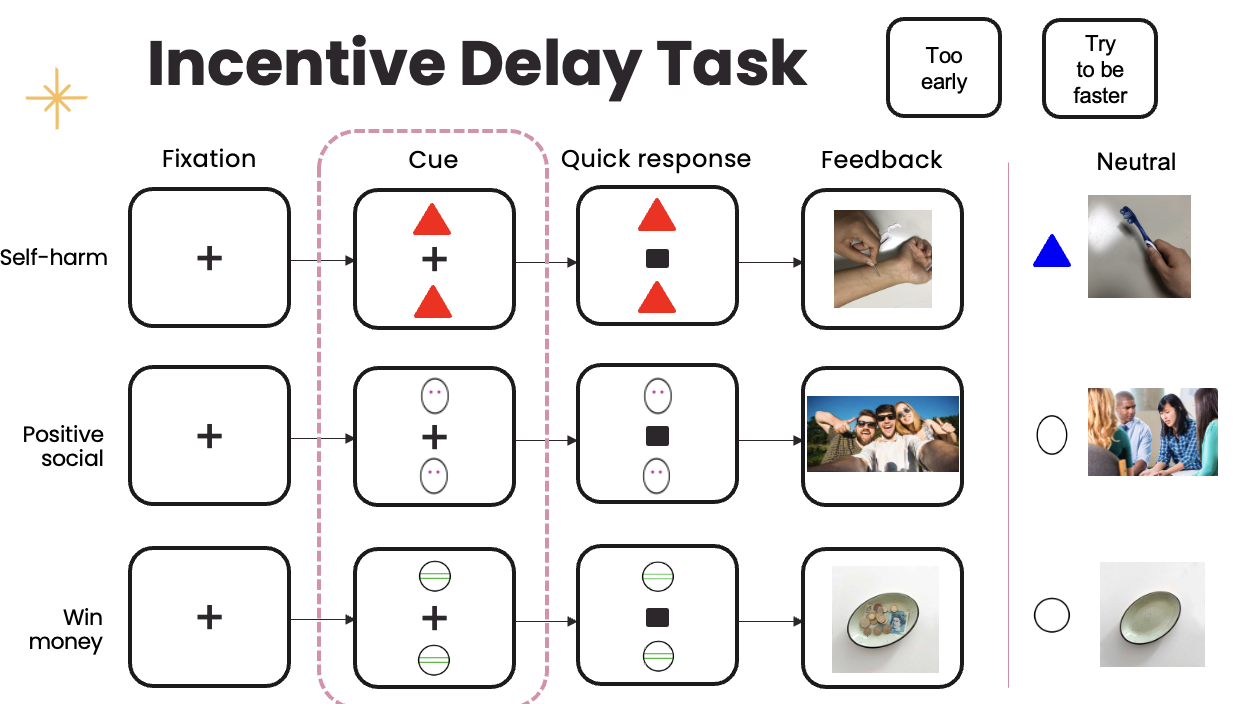

In short, the participants are asked to look at a fixation cross. Then, after a short time, they receive a visual cue which lets them know that a visual stimulus (in the shape of a black square) will appear on the screen. Once the black square appears, the participants are instructed to press a button as quickly as they can. If they press within the time limit, they get shown a picture as feedback. 


Depending on the type of visual cue that they were shown before the black square appears, participants will receive a specific type of feedback/reward. In some cases, it's positive (e.g. friends having fun), in others it's negative (self harm images). For today's workshop we will focus on the latter, where the feedback/reward consists of pictures related to self-harm. In this type of task, we can measure the speed and accuracy of a participant's response in order to see if they are slower or more error prone dependent on the type of picture that they are expecting to receive.

Below you will find some more details about the participants that took part in the study

Participant groups:
1. Self-harm Group - SH 
2. Negative Affect Group (young people with no self-harm, matched on depression/anxiety/stress to SH group) - NHC
3. Healthy Control Group (not matched on mental health outcomes) - HC

The dataset will contain the following variables:
1. TR - number of correct responses to the target that a participant made for each condition, measuring motivation to obtain the 'reward'
2. SH vs neutralSH - Self-harm pictures either represent self-harm in a neutral way (e.g. someone holding a blade), or in an explicit way (e.g. someone cutting themselves). The latter is marked as *SH* and the former as *neutralSH* in the data. The explicit pictures were also personalised to the preferred method of self-harm of the participant.
3. posSO vs neutralSO - Social condition pictures are shown in a neutral (e.g. people sitting togheter) or positive way (e.g. people having fun). The latter is marked as *posSO* and the former as *neutralSO* in the data. 
4. nomoney vs winmoney - Images of empty bowls or bowls with money are shown. The latter is marked as *winmoney* and the former as *nomoney* in the data.


Using this dataset we will learn how to run and interpret one-way and two-way ANOVAs in python. But first, let's visualise the data.

## Data visualisation

First let us import all the relevant libraries and have a look at our data.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import seaborn as sb
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_excel("Data/Self-harm_dataset.xlsx", sheet_name='Self-Harm 1-way')
df.tail()

,Participant ID,Testing,TR_posSO,TR_SH,TR_winmoney,Gender,Group,Education_level,TR_neutralSH,TR_neutralSO,TR_nomoney
149,361,Online,23,NaN,NaN,F,HC,gcse,34,36,35
150,362,Online,22,NaN,NaN,F,HC,gcse,25,26,15
151,363,Online,35,NaN,NaN,F,HC,gcse,31,34,39
152,365,Online,28,NaN,NaN,F,HC,bachelors,25,32,30
153,366,Online,45,NaN,NaN,M,HC,gcse,42,48,43


Let's use `Seaborn` to visualise our data. Note that this data is already cleaned and pre-processed, so we will skip all of the steps that you were taught in the first two workshops and focus on visualisation/analysis for today. You will soon understand why we have some missing values. First, let's look at the number of correct responses that different groups make for the self harm picture condition.

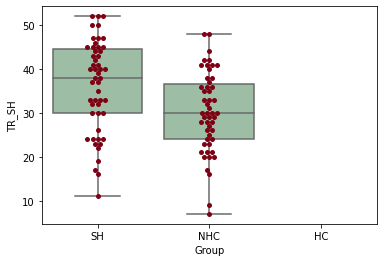

In [6]:
ax = sb.boxplot(x='Group', y='TR_SH', data=df, color='#99c2a2')
ax = sb.swarmplot(x="Group", y="TR_SH", data=df, color='#7d0013')
plt.show()

We can see that people who self-harm perform considerably better than matched controls, suggesting that seeing explicit images of self-harm, may act as a reward for people who themselves self-harm. Unmatched healthy controls were not shown any of the explicit self-harm images, which is why their data is missing.

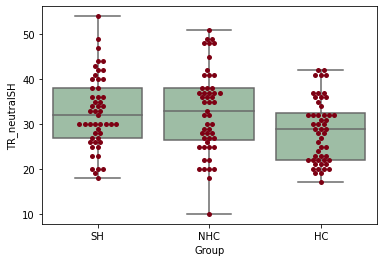

In [7]:
ax = sb.boxplot(x='Group', y='TR_neutralSH', data=df, color='#99c2a2')
ax = sb.swarmplot(x="Group", y="TR_neutralSH", data=df, color='#7d0013')
plt.show()

Here, we can see that when the participants are shown the neutral self-harm pictures, there does not seem to be much of a difference between those who self harm and matched controls, but it does look like the unmatched controls perform slightly worse than both self-harming participants and matched-controls.

Now, let's examine if there are any significant differences between these 3 groups by using a one-way ANOVA.

## One-way ANOVA

`ANalysis Of VAriance` (ANOVA), is a widely used method designed for comparing differences in means among three or more groups. One easy way to think about it is as a generalized t-test. With t-tests we can only compare two groups at a time, whereas with ANOVAs we could even compare 10 different groups at the same time. But for today, we will use a simpler example, where we want to compare 3 groups using an ANOVA.

That is, we are interested if there is a difference in cognitive performance between people who self-harm, matched controls, and un-matched controls. Each individual falls into a group described by a (categorical) grouping variable (e.g. type of participant) and for each individual we measure some continuous outcome (e.g. cognitive performance).

But before we run the ANOVA, we need to decide which type is most appropiate for our data. There are 3 main types of ANOVAs

1. `Between-participants ANOVA` / `Independent Samples ANOVA` - This type of ANOVA is used when the conditions that are being compared contains different people. Or in other words, when our samples are independent from each other. For instance, you might have a group made up of controls, and another made up of patients (both performing the same task).
2. `Within-Participants ANOVA` / `Repeated Measures ANOVA` - This type of ANOVA is used when the same people are found in multiple conditions. For instance you might have a patient after given placebo as part of conditions 1, then the same patient after given a drug as part of condition 2.
3. `Mixed ANOVA` - This type of ANOVA is used when you have multiple dimensions, and in one the conditions are between-participants while the other is the same particiapnts under difference conditions - e.g., patients and controls on drug and placebo. We will talk more about this during the workshop today.

Given that we want to compare 3 different groups of people where you do not find the same person in multiple groups, the between-participants ANOVA is the appropiate test to run here. 

To run the ANOVA, we first need to install the relevant packages in Python. If the below commands don't work, add an exclamation mark at the start of the line

In [8]:
pip install bioinfokit

zsh:1: command not found: pip


In [9]:
pip install pingouin

zsh:1: command not found: pip


In [10]:
import pingouin as pg
from bioinfokit.analys import stat

Let's have number of correct responses during neutral self-harm trials as our predicted variable, and the participant type as the conditions that we are comparing. We can run the between-participant ANOVA and show a summary table of the results as below.

In [11]:
res = stat()
res.anova_stat(df=df, res_var='TR_neutralSH', anova_model='TR_neutralSH ~ C(Group)')
res.anova_summary
# output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
C(Group),2.0,588.150575,294.075287,4.377117,0.014194
Residual,151.0,10144.888386,67.184691,NaN,NaN


The `p value` obtained from ANOVA analysis is significant (p < 0.05), and therefore, we can reject the null hypothesis and conclude that there are significant differences between the groups we examined (people who self harm, controls matched for negative affect, controls not matched for negative affect)

Note on `F-value`: `F-value` is inversely related to p value and higher `F-value` indicates a significant p value. But how is `F-value` calculated? If we look at the table, the `F-value` has a relatively simple formula:

$$F_{value} = \frac{MeanSquaresTreatment}{MeanSquaresError} $$

Or in other words, `F-value` = variation between sample means / variation within the samples. So in the above table, the `F-value` is calculated as 294.08 / 67.18 = 4.38. What this also means is that The higher the `F-value` in an ANOVA, the higher the variation between sample means relative to the variation within the samples.

When you perform a one-way ANOVA for a single study, you get just one `F-value`. However, if we were to draw multiple random samples of the same size from a larger population and performed the same one-way ANOVA, we would obtain many different `F-values` and we could plot a distribution of all of them. This type of distribution is known as a `sampling distribution`.

Because the F-distribution assumes that the null hypothesis is true (i.e. no difference between groups), we can place the `F-value` from our study in the F-distribution to determine how consistent our results are with the null hypothesis and to calculate probabilities.

The probability that we want to calculate is the probability of observing an F-value that is at least as high as the value that our study obtained. That probability allows us to determine how common or rare our F-value is under the assumption that the null hypothesis is true. If the probability is low enough, we can conclude that our data is inconsistent with the null hypothesis. The evidence in the sample data is strong enough to reject the null hypothesis for the entire population.

This probability that we’re calculating is also known as the `p-value`!

So, what do we do if we find a significant `p-value` in our ANOVA?

This result tells us that the group differences are statistically significant, but it does not tell us which of the 3 groups are significantly different from each other. To know the pairs of significant different groups, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using `Tukey’s honestly significantly differenced (HSD) test`.

Here the `endog` variable represents the dependent variable in your model, and `groups` represents the comparisons that you want to examine.

In [12]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df['TR_neutralSH'], groups=df['Group'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    HC    NHC    4.227 0.0263  0.4034 8.0506   True
    HC     SH   4.0309 0.0362  0.2073 7.8545   True
   NHC     SH  -0.1961  0.992 -4.0382 3.6461  False
---------------------------------------------------


From this, we can see that the unmatched controls performed significantly worse than matched controls and people who self-harm.

Note: If the `p-value` obtained from the ANOVA came back as non-significant, we would not be allowed to run post-hoc tests. The only exception to this rule is if you had a very specific hypothesis about one of the groups that you were investigating. For instance, if your main hypothesis was to look at differences between unmatched controls and those who self-harm and you had strong theoretical proof that this difference between groups should exist, you'd be allowed to examine and report the `post-hoc comparison` for it.

--------------
## Code here
Repeat the analysis but this time try to understand whether there is a significant difference between the three groups when they are shown positive social conditions and/or neutral social conditions. Try to create the distributions plot, and then run the appropriate statistical tests.

In [13]:
# Code here

-------

## Two-way ANOVA

Now that we have seen that people who self-harm and matched controls do not differ from each other in performance when shown neutral pictures of self-harm, we may wonder, is this also the case when they see explicit pictures of self-harm that are personalized for the type of self-harm that they do? It may be that the neutral pictures do not ellicit enough of an effect because they are too abstract or not personally relevant. From the visualisations we did earlier it does look like those who self harm perform better than matched controls when shown explicit self-harm stimuli. Let's have another look at that graph.

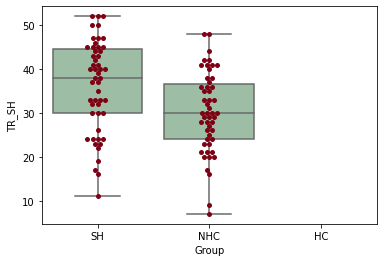

In [14]:
ax = sb.boxplot(x='Group', y='TR_SH', data=df, color='#99c2a2')
ax = sb.swarmplot(x="Group", y="TR_SH", data=df, color='#7d0013')
plt.show()

So we might wonder, does the type of self-harm images that the participants see influence the group differences that we observe between those who self-harm and matched controls? Or in other words, does the performance of the two groups (self-harm and controls) differ depending on whether the self-harm stimuli are explicit or neutral?

To answer this question, we can use a `two-way ANOVA` . So far, we have used a `one-way ANOVA` , because we only had one dimension in our design (e.g. participant type). We can of course have many more, though usually researchers include a maximum of 2 or 3 different dimensions. That is because the analysis and interpretation of the results becomes more complex as the number of dimensions increases. Let's add a second dimension variable to our ANOVA (e.g. type of self-harm images that participants see). Is this a within- or between-participant variable?

For the `two-way ANOVA` analysis to take place, your data needs to be in a specific format. In this workshop, we already created this format for you. Before you go further, take some time to inspect the format of your data and how it differs from the previous dataset.

In [15]:
df2 = pd.read_csv("Data/Self-harm_format2.csv")
df2.head(10)

,Unnamed: 0,ID,Gender,Group,Education_level,TR,SH_stimuli,Age
0,0,1,M,SH,a level,47,Neutral,78.0
1,1,2,F,SH,masters,30,Neutral,62.0
2,2,3,F,SH,bachelors,34,Neutral,53.0
3,3,4,F,SH,masters,33,Neutral,71.0
4,4,5,F,SH,bachelors,25,Neutral,41.0
5,5,6,F,SH,gcse,25,Neutral,54.0
6,6,7,F,SH,a level,40,Neutral,78.0
7,7,8,F,SH,a level,40,Neutral,60.0
8,8,9,F,SH,a level,35,Neutral,71.0
9,9,10,F,SH,as level,20,Neutral,41.0


Now let's plot our data

<AxesSubplot: xlabel='Group', ylabel='TR'>

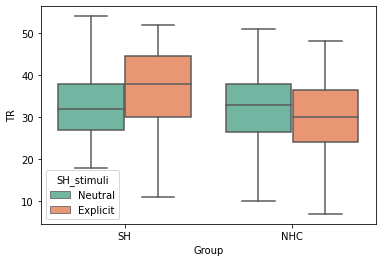

In [32]:
sb.boxplot(x="Group", y="TR", hue="SH_stimuli", data=df2, palette="Set2") 


As we can see, we have two dimension variables. The first is participant type (or group), which consists of people who self-harm and matched controls. The second consists of the type of self-harm stimuli that are shown to the participant (e.g. neutral or explicit). Note that unmatched controls were excluded from this analysis as they did not take part in the arm of the study that included explcit self-harm images.

Now let's run the ANOVA analysis. To do so, we first need to decide what type of ANOVA to use. One of our dimensions is the participant type, which contains two independent groups of people (e.g. those who self harm and matched controls). Thus, this would be a between subjects dimension. The other refers to the self-harm stimuli, but in this case everyone sees both the neutral AND the explicit self-harm stimuli. Thus, in this case, we have a within subjects dimension. 

Since the dimensions we have differ in their design, we will conduct a `mixed-effects ANOVA`.

In [17]:
res = pg.mixed_anova(dv = 'TR', between='Group', within='SH_stimuli', subject='ID', data=df2)
res

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,417.960784,1,100,417.960784,2.942443,0.089377,0.028583,NaN
1,SH_stimuli,12.254902,1,100,12.254902,0.402914,0.527038,0.004013,1.0
2,Interaction,477.176471,1,100,477.176471,15.688499,0.000140,0.135610,NaN


What we see in the table is that the effect of Group and SH_stimuli are not statistically significant on their own. In other words, matched controls and patients with self-harm do not differ on average in their performance (across both explicit and neutral stimuli). Similarly, there is no difference in performance between explicit and neutral self-harm stimuli (across self-harm and controls).

But we do see a significant interaction effect. When the interaction term is statistically significant, this indicates that the effect that one independent variable (e.g., self-harm stimuli) has on the dependent variable (e.g., cognitive performance) depends on the level of the other independent variable (e.g., participant group). However, the ANOVA itself does not tell us much about how exactly this dependence works. The easiest method to interpret this result is to visualize the interaction.

Let's run this below.

In [18]:
from statsmodels.graphics.factorplots import interaction_plot

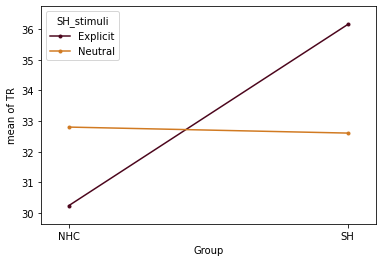

In [19]:
fig = interaction_plot(x=df2['Group'], trace=df2['SH_stimuli'], response=df2['TR'], 
    colors=['#4c061d','#d17a22'])
plt.show()

By looking at this we can explain what the interaction effect means. If we look at the difference in performance between NHC and SH groups for the neutral self-harm stimuli, we can see that there is virtually no difference (so the two group perform the same on average). However if we look at the difference in performance between NHC and SH while seeing the explicit self-harm stimuli, we can see that the SH group performs considerably better. Thus, from this we can conclude that people who self-harm perform better than controls on the Incentive Delay Task, when given explicit self-harm stimuli as feedback (as opposed to neutral self-harm stimuli).

How would you interpret these results?

To confirm this effect we can also run a `post-hoc analysis`, specifically on the comparisons shown in the interaction

In [20]:
df2['combination'] = df2.Group.astype(str) + " / " + df2.SH_stimuli.astype(str) #First create a variable which contains all 4 different comparison groups that we want to examine
df2.combination

0        SH / Neutral
1        SH / Neutral
2        SH / Neutral
3        SH / Neutral
4        SH / Neutral
            ...      
199    NHC / Explicit
200    NHC / Explicit
201    NHC / Explicit
202    NHC / Explicit
203    NHC / Explicit
Name: combination, Length: 204, dtype: object

Then run post-hoc comparisons on this data.

In [21]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=df2['TR'], groups=df2['combination'], alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2    meandiff p-adj   lower   upper  reject
-------------------------------------------------------------------
NHC / Explicit NHC / Neutral   2.5686 0.5028 -2.1956  7.3328  False
NHC / Explicit SH / Explicit   5.9216 0.0081  1.1574 10.6857   True
NHC / Explicit  SH / Neutral   2.3725 0.5702 -2.3916  7.1367  False
 NHC / Neutral SH / Explicit   3.3529 0.2654 -1.4112  8.1171  False
 NHC / Neutral  SH / Neutral  -0.1961 0.9996 -4.9603  4.5681  False
 SH / Explicit  SH / Neutral   -3.549 0.2188 -8.3132  1.2152  False
-------------------------------------------------------------------


From here we can see the only statistically significant difference is that between NHC during Explicit stimuli and SH during Explicit stimuli, which is in line with our previous observation.

For demonstration purposes, we also show how you would run a within subjects (repeated-measures) ANOVA examining whether the SH stimuli are neutral vs explicit, that is, regardless of group.

In [22]:
res = pg.rm_anova(dv='TR', within='SH_stimuli', subject='ID', data=df2, detailed=True)
res

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,SH_stimuli,12.254902,1,12.254902,0.351758,0.554446,0.000675,1.0
1,Error,3518.745098,101,34.839060,NaN,NaN,NaN,NaN


In [23]:
df2.head()

,Unnamed: 0,ID,Gender,Group,Education_level,TR,SH_stimuli,Age,combination
0,0,1,M,SH,a level,47,Neutral,78.0,SH / Neutral
1,1,2,F,SH,masters,30,Neutral,62.0,SH / Neutral
2,2,3,F,SH,bachelors,34,Neutral,53.0,SH / Neutral
3,3,4,F,SH,masters,33,Neutral,71.0,SH / Neutral
4,4,5,F,SH,bachelors,25,Neutral,41.0,SH / Neutral


## Multiple Linear Regression

Now that we got a good idea about how to run both a `one-way ANOVA` and a `two-way ANOVA`, the next step is to look at some more complex examples of regression. `Two-way ANOVA` is mainly used to look at interactions between variables but the same can be obtained by running a regression analysis with an interaction effect within it. This part of the workshop will walk you through how to do that. But first let's remind ourselves how to run and interpret a multiple regression model without interaction effects. We will try to do two things to be sure that you fully understand regression analysis:

1. Run the regression analysis using functions from specific packages and interpret the results
2. Build a linear regression from scratch by coding our own functions

Let's start by running the model with already made functions..

In [24]:
model = sm.OLS.from_formula('TR ~ Group + SH_stimuli', data = df2) #Here we mention the variable names we want to include and the dataset
results = model.fit() #Then we run the regression model
print(results.summary()) #Finally, we tell Python to create a summary of all the results and print it

                            OLS Regression Results                            
Dep. Variable:                     TR   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.440
Date:                Wed, 09 Nov 2022   Prob (F-statistic):             0.0898
Time:                        11:23:53   Log-Likelihood:                -744.84
No. Observations:                 204   AIC:                             1496.
Df Residuals:                     201   BIC:                             1506.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                31.76

There is a lot of information here, but let's focus on the bits which tell us if the regression has any significant effects.

In [25]:
summaryTable =results.summary()
summaryTable = summaryTable.tables[1]
summaryTable

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,31.7647,1.139,27.895,0.000,29.519,34.010
Group[T.SH],2.8627,1.315,2.177,0.031,0.270,5.455
SH_stimuli[T.Neutral],-0.4902,1.315,-0.373,0.710,-3.083,2.103


From this we can see there is a significant effect of `Group` and a non-significant effect of `SH_stimuli`. The `t-statistic` is similar to the `F-value` in that it is inversely related to the p-value. In other words, the lower the p-value the higher the t-value tends to be. That is why it is good practice to report both when discussing your results.

In addition to these metrics, we also have the `coef` which is short for `coefficient` (or `beta coefficient`). This tells us how much the cognitive performance of a person changes, depending on the effects introduced in the model. For instance, the coefficient for the `Group` variable is approximately 2.86, which can be interpreted as the following: A person who belongs in the self-harm group is estimated to have a cognitive performance of 2.86 points higher than if they were part of the matched control group.

The `intercept` is another useful value, and in this scenario it can be thought of as the average cognitive performance of the people and conditions that are not explicitly included in the other terms of the model (i.e., people who do not self harm when performing under the explicit condition). The `coef` of the intercept tells us this value. In this case, it's approximately 31.76. 

So, what would the model estimate to be the cognitive score of a person with self-harm that viewed neutral self-harm feedback?

Answer = 31.76 + 2.86 - 0.4902 = 34.13

What would the model predict for someone who does not self harm and received explicit self-harm stimuli?

--------------
## Code here

Try to run the linear regression, but this time predict the cognitive performance based on age. Interpret the results.

In [26]:
# CODE HERE


---------

### What is a linear regression and how do you build it from scratch?

So far we have focused only on interpreting the results that we obtain from ANOVA and regression. But do we really understand how these statistical tests work behind the scenes? To demistify this black box, we will tear it apart and build it again from ground up. More specifically, we will now build a linear model from scratch to predict cognitive performance in the task we discussed thus far, based on age. If what we are doing is correct, then our results should converge with those obtained using the ready-to-use functions. We showed one of these in the Primer, and this workshop we will extend those concepts.

If you completed the statistics primer, you should know that a linear model can be defined as follows:

$y = mx + b$

and more specifically in this case:

$\text{cognitive_performance} = m \cdot \text{age} + b$

where $m$ and $b$ are unknown. The aim of linear regression is to find the line defined by  $m$ and $b$ that best fits our data.
To understand what $m$ and $b$ are, look at the following picture. $m$ corresponds to the slope of the line (or inclination in simple terms), instead b corresponds to the intercept, or intersection of the line with the y-axis.

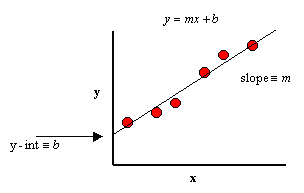

Let's plot the age and cognitive score data, and change different values for m and b.

`How does the line change? Are there some m and b parameters that are better at describing the data? Play around with the parameters until the line fits better`

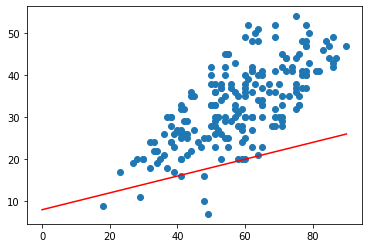

In [27]:
m = 0.2
b = 8

x = np.linspace(0,90,100)
y = m*x+b


plt.scatter(df2.Age, df2.TR)
plt.plot(x, y, '-r')


Great! Now you should have understood what the m and b parameters are. If you think about it, m is nothing more than the `coefficient` of Age that you obtained before when simply running the pre-made function, and b is the coefficients of the intercept.

`How do you find the best b and m?`

When you were finding the *best* line, you were probably trying to find the parameters that move the line in such a way that it crosses most of the data points in the graph. You can do this qualitatively by looking at the graph, or, as an alternative, you can use more quantitative measures. For example, you can measure how far each point is from the line; the farther are the points, the worse is the line. This measure of distance, or `error`, is defined as `residual`. The residuals are represented in the following plot as the black dotted line. Concretely, they correspond to the difference between the observed value $y_i$ (which is represented by the blue dots) and the value $\hat{y}_i$ predicted by the line (which is the projection of the blue dots on the line). That means that bigger residuals translate to a worse prediction of the fit line. 

`IMPORTANT`: in the figure only a subsample of the actual points is shown.

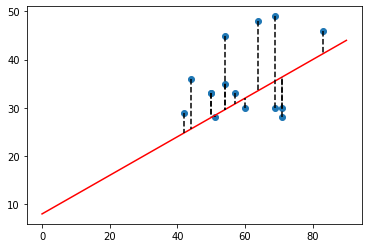

In [28]:
m = 0.4
b = 8

x = np.linspace(0,90,num=15)
y = m*x+b

dfsub = df2.sample(n=15)
plt.scatter(dfsub.Age, dfsub.TR)
plt.plot(x, y, '-r')

for xx, yy in zip(dfsub.Age, dfsub.TR):
    predicted_y = (xx * m) + b
    plt.plot([xx, xx], [yy, predicted_y], "--k")

Put into mathematical terms, the `residuals` can be represented as:
    
 $$(\hat{y}_i - y_i)$$
 
In simple terms, this means that the residuals are the distance between a data point and the regression line. However, as you can observe in the plot, in some cases the predicted value is bigger than the actual value, and viceversa. We don't really care about that, since we just want to measure the distance between the points. This is why we then calculate the squared difference.

 $$(\hat{y}_i - y_i)^2$$
 
 Now, this equation just tells how far away from the fit line one of the points is, but it does not tell us about all of the data points. To understand how good is the fit of the line, we need to consider all data points in one go. This is why we take the average across the residuals of all N points
 
 $$ \frac{1}{N} \sum_{i=1}^{N} (\hat{y}_i - y_i)^2$$
 
 By replacing the $\hat{y}_i$ in the above equation of the linear regression we obtain the following:
 
 $$ \hat{y}_i = mx_i + b$$

 $$ \frac{1}{N} \sum_{i=1}^{N} (m x_i + b - y_i)^2$$

The last equation is known as the `Mean Squared Error` (also known as `MSE`) and it is one of the most common metrics of performance of regression (Stay tuned for more information on this in day 6 of the Workshop!). It can also be considered a *loss* function, meaning a measure of how well the predicted line fits the observed values.

-------
## Code here

Define a function called *mean_squared_error* that calculates the mean squared error by taking as input a paramter **b**, **m**, **x** and **y**. 

In [29]:
# CODE HERE


-------

In [ ]:
mean_squared_error(0.5, 0, df2.Age, df2.TR)

Now we have a more quantitative measure of distance, and we can find the best line by simply changing the *b* and *m* parameters many times until we think we found the best line. 
However, there is a much better, and automated way to do this! 
To be able to do this, we need to use a bit of *calculus*. 

First of all, our aim is to identify the parameters *m* and *b* such that the mean squared error is minimised. 
For that we will use the *gradient*: a mathematical operation that specifies at any point of a function what the direction of maximum growth is (e.g. the slope of the function in a specific point).
We can start with any estimate of *m* and *b*, and the gradient will show us how we should change our estimate to make the MSE function grow.
And since we know the direction of growth, we can just follow the opposite direction to make the MSE smaller.
The gradient therefore provides the direction to be followed in order to minimise the MSE function. Since, we aim to reach the minimum, we want to find the point where the gradient is 0 (e.g where the slope is equal to 0).

Consider the following figure. 
The MSE function can be represented as a curve with a minimum point, which we want to identify.
The star is our initial estimate, and
the red arrows represent the gradient in that point of the curve, and point towards the direction we want to move towards.
Concretely, to calculate the gradient we need to obtain the partial derivatives of the function, relative to *m* and *b*.

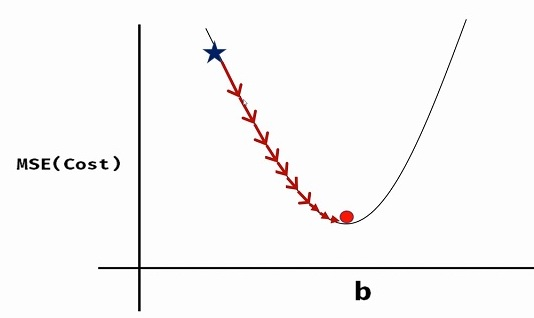

By calculating the partial derivatives of the MSE functions in terms of *m* and *b*, the results are the following:

$$ m = \dfrac{\sum_i(x_i - \bar x)(y_i - \bar y)}{\sum_i(x_i - \bar x)^2}$$
&nbsp;
$$ b = \bar y - m \bar x$$

-------
## Code here

Define a function called *least_squares_estimates* that calculates the partial derivatives and returns the optimal *m* and *b*. The input of the function has to be the x and y values.


In [ ]:
## CODE HERE


-------

Once you defined the function, you can identify the optimal m and b, and plot the line that fits the best the data.

In [ ]:
m, b = least_squares_estimate(df2.Age, df2.TR)
print("The optimal m is:", m)
print("The optimal b is:", b)

The optimal m is: 0.44497447353715247
The optimal b is: 7.207898349581015


Text(0, 0.5, 'TR')

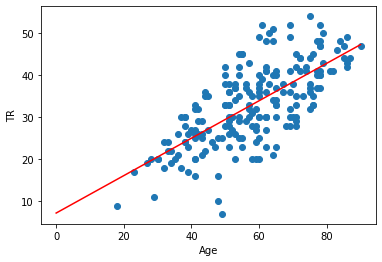

In [ ]:
x = np.linspace(0,90,100)
y = m*x+b


plt.scatter(df2.Age, df2.TR)
plt.plot(x, y, '-r')
plt.xlabel("Age")
plt.ylabel("TR")

Now, if you did everything correctly, your *b* and *m* should match with the results you obtained before when using a ready to use Python function, and specifically with the coefficients of the intercept and of Age!

## Multiple Regression Model with Interaction

At this point you should feel confident with linear regression. Let's run the same model as above but now also look at the interaction between `Group` and `SH_stimuli`. This is very similar to the analysis we performed when running the `two-way ANOVA`.

We indicate that we want to examine the interaction between two variables by adding a colon between their names instead of a plus.

In [ ]:
model = sm.OLS.from_formula('TR ~ Group + SH_stimuli + SH_stimuli:Group', data = df2) #Here we mention the variable names we want to include and the dataset
results = model.fit() #Then we run the regression model
print(results.summary()) #Finally, we tell Python to create a summary of all the results and print it

                            OLS Regression Results                            
Dep. Variable:                     TR   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.508
Date:                Sun, 06 Nov 2022   Prob (F-statistic):             0.0163
Time:                        17:30:17   Log-Likelihood:                -742.06
No. Observations:                 204   AIC:                             1492.
Df Residuals:                     200   BIC:                             1505.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:
summaryTable =results.summary()
summaryTable = summaryTable.tables[1]
summaryTable


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,30.2353,1.300,23.252,0.000,27.671,32.799
Group[T.SH],5.9216,1.839,3.220,0.001,2.295,9.548
SH_stimuli[T.Neutral],2.5686,1.839,1.397,0.164,-1.058,6.195
SH_stimuli[T.Neutral]:Group[T.SH],-6.1176,2.601,-2.352,0.020,-11.246,-0.990


We can see that once again, the interaction between the two groups is significant, which is very similar to what we found in the `two-way ANOVA`. Now, if we wanted to intepret the results of the interaction, we would use an interaction plot, in the same way we did for the ANOVA. And this would lead us to the same conclusion. For the regression, you do not need to run post-hoc tests, it is often enough to report the `interaction effect` (together with the `coef, t-value and p-value`) then use the interaction plot to interpret what the interaction means.

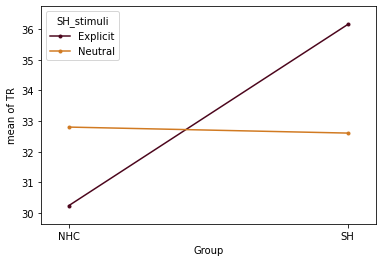

In [ ]:
fig = interaction_plot(x=df2['Group'], trace=df2['SH_stimuli'], response=df2['TR'], 
    colors=['#4c061d','#d17a22'])
plt.show()

 However, if we look closely at the results we will see that the `Group` effect is significant in the regression but not in the ANOVA. That is because the two models make different assumptions about the data you inputted. The regression analysis for example assumes that all your `effects are independent from each other`, whereas the mixed two-way ANOVA doesn't. What that means in practice is that the regression model assumes that those who were shown neutral self-harm stimuli and those who were shown explicit self-harm stimuli are completely different people (when in reality, the same person took part in both conditions). This creates bias in your analysis and leads to different results. The same issue would come up if you tried to run a between-subjects two-way ANOVA, instead of the mixed design.



So, in this scenario, `using a mixed two-way ANOVA is preferred over the linear regression`. Of course, there are ways in which you can modify the linear regression to account for the fact that some of your measures are not independent (see `linear mixed-effects models`), but this is beyond the scope of this workshop as it is a relatively complex concept to grasp.

------
## Code here

Create a model examining the interaction between participant type (i.e. self-harm and matched control) and sex (i.e. female, male). Try running this both via an ANOVA and via a regression. What do you find?

In [ ]:
## CODE HERE


-------

## Challenge

In today's challenge you will work with a dataset containing participants with an eating disorder (ED) and matched controls (MC). Those participants also completed the Incentive Delay Task that we discussed in today's workshop, but instead of being shown stimuli related to self-harm, they were shown stimuli related to ED. In the explicit condition, the stimuli were shown tasty food which often get binged, while in the neutral condition, participants were not shown stimuli associated with food (i.e. empty plates, mugs). Using this dataset examine the following questions:

1. How does the Reaction Time (RT) of the ED group differ from that of the MC, when rewarded with explicit pictures of food?
2. How does RT differ between ED and MC, when accounting for Gender and Education?
3. Is there an interaction between participant type (e.g. ED and MC) and education (i.e. pre-bachelor, post-bachelor) when prediciting a person's RT during the explicit stimuli condition?

HINT: Make sure your data is clean and in the right format for regression/ANOVA analysis. To understand what is the right format, check the format of the data provided in the workshop. The data for the challenge were **not** cleaned in advance. 

The data are saved as *ed_datatset.xlsx*. 

Some information about the variables in the data:

1. *MeanRT* - mean RTs to the target for each condition 
2. *PR* - number of premature responses to the cue for each condition, measuring waiting impulsivity (inability to wait for a 'reward')
3. *TR* - number of correct responses to the target for each condition, measuring motivation to obtain the 'reward'
4. *LR* - number of late responses after the target disappears for each condition


The main variables we are interested in are the following:

1. WinFood_MeanRT - Refers to the RT when the participants were shown food as a reward for completing the trial succesfully (i.e. explicit feedback).
2. NoFood_MeanRT - Refers to the RT when the participants were shown items indicative of food like empty plates (i.e. neutral feedback).